## Predict the average daily fare of car rental using car data only

Jiabin Chen <br>
2/24/2020 

import modules

In [1]:
import pandas as pd

In [36]:
import matplotlib.pyplot as plt

In [37]:
from datetime import datetime

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [106]:
from math import sqrt

### Data Preparation
Since the data size is big, we couldn't download all data from the database together. We downloaded them seperately and combined using Python.

In [2]:
d1 = pd.read_csv("LAX_pdate_1.csv")

In [3]:
d2 = pd.read_csv("LAX_Midsize_Jul to Dec.csv")

In [5]:
d1.head

<bound method NDFrame.head of       AGENCY       PDATE       DDATE  LOR  MIN_DAILY_FARE  AVG_DAILY_FARE
0         ZR  2019-01-29  2019-01-30    1        32.67000       69.630560
1         ZT  2019-01-29  2019-01-30    1        32.66000       72.093254
2         ET  2019-01-29  2019-01-30    1        55.88000       87.786838
3         ZE  2019-01-31  2019-02-01    1        41.00000       80.173371
4         ZT  2019-01-09  2019-01-10    1        24.97000       46.776791
...      ...         ...         ...  ...             ...             ...
13679     ET  2019-06-30  2019-07-02    2        25.62000       66.100028
13680     ZR  2019-06-29  2019-07-01    2        31.01000       65.534640
13681     ZT  2019-06-29  2019-07-07    8        26.29625       50.773708
13682     ZT  2019-06-30  2019-07-08    8        25.81000       56.335199
13683     ZI  2019-06-21  2019-06-22    1        99.26000      106.175789

[13684 rows x 6 columns]>

In [6]:
d2.head

<bound method NDFrame.head of       AGENCY       PDATE       DDATE  LOR  MIN_DAILY_FARE  AVG_DAILY_FARE
0         ZE  2019-08-19  2019-08-28    9       41.197778       68.981905
1         ZR  2019-10-14  2019-10-15    1       54.440000       82.182584
2         ET  2019-07-19  2019-07-21    2       74.160000      100.439446
3         ZT  2019-07-19  2019-07-21    2       55.830000       91.624305
4         ZT  2019-09-09  2019-09-17    8       34.757500       53.884875
...      ...         ...         ...  ...             ...             ...
14695     ZI  2019-12-20  2019-12-21    1       61.320000       77.796547
14696     ZD  2019-12-29  2019-12-30    1      104.890000      104.890000
14697     ZE  2019-12-19  2019-12-25    6       64.806667      100.442161
14698     ZD  2019-12-28  2020-01-27   30       38.989333       41.233374
14699     ZD  2019-12-29  2019-12-31    2      104.905000      105.760185

[14700 rows x 6 columns]>

In [14]:
d = d1.append(d2, ignore_index=True)

In [15]:
d

,AGENCY,PDATE,DDATE,LOR,MIN_DAILY_FARE,AVG_DAILY_FARE
0,ZR,2019-01-29,2019-01-30,1,32.670000,69.630560
1,ZT,2019-01-29,2019-01-30,1,32.660000,72.093254
2,ET,2019-01-29,2019-01-30,1,55.880000,87.786838
3,ZE,2019-01-31,2019-02-01,1,41.000000,80.173371
4,ZT,2019-01-09,2019-01-10,1,24.970000,46.776791
...,...,...,...,...,...,...
28379,ZI,2019-12-20,2019-12-21,1,61.320000,77.796547
28380,ZD,2019-12-29,2019-12-30,1,104.890000,104.890000
28381,ZE,2019-12-19,2019-12-25,6,64.806667,100.442161
28382,ZD,2019-12-28,2020-01-27,30,38.989333,41.233374


For time series data, we first tried the basic preprocessing method, which is converting datatime data into categorical data (month, day). 

In [22]:
d['MONTH_PDATE'] = ""
d['DAY_PDATE'] = ""

In [29]:
for i in range(0,len(d)):
    d['MONTH_PDATE'][i] = d['PDATE'][i].split("-")[1]
    d['DAY_PDATE'][i] = d['PDATE'][i].split("-")[2]

D:\Anaconda201910\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda201910\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
d = d.sort_values(by=['PDATE'])

In [46]:
d

,AGENCY,PDATE,DDATE,LOR,MIN_DAILY_FARE,AVG_DAILY_FARE,MONTH_PDATE,DAY_PDATE
7380,ZE,2019-01-01,2019-01-06,5,30.978000,72.084419,01,01
8949,ZR,2019-01-01,2019-01-02,1,18.760000,50.374389,01,01
444,ZT,2019-01-01,2019-01-06,5,24.966000,38.488829,01,01
12372,ET,2019-01-01,2019-01-10,9,22.786667,59.388324,01,01
12373,ZD,2019-01-01,2019-01-10,9,26.008889,52.202661,01,01
...,...,...,...,...,...,...,...,...
28309,ZI,2019-12-31,2020-01-05,5,70.078000,123.885821,12,31
17278,ZR,2019-12-31,2020-01-09,9,17.620000,60.839116,12,31
19096,AL,2019-12-31,2020-01-30,30,36.514667,40.383893,12,31
17281,ET,2019-12-31,2020-01-30,30,36.516000,40.616119,12,31


Save for further use.

In [47]:
d.to_csv("combined_car_rental_data.csv")

In [ ]:
# run from here next time

In [ ]:
d = pd.read_csv("combined_car_rental_data.csv")

In [48]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28384 entries, 7380 to 20888
Data columns (total 8 columns):
AGENCY            28384 non-null object
PDATE             28384 non-null object
DDATE             28384 non-null object
LOR               28384 non-null int64
MIN_DAILY_FARE    28384 non-null float64
AVG_DAILY_FARE    28384 non-null float64
MONTH_PDATE       28384 non-null object
DAY_PDATE         28384 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 1.9+ MB


### Data Visualization

Average daily fare with pick up date

<b>Insight: daily fare changes with time. Higher in summer time and at the end of year.

In [53]:
avg_agency = d.groupby(['PDATE']).mean()

In [58]:
avg_agency = avg_agency.reset_index()

In [81]:
avg_agency

,PDATE,LOR,MIN_DAILY_FARE,AVG_DAILY_FARE
0,2019-01-01,5.000000,32.485056,60.984059
1,2019-01-02,5.000000,30.063898,59.543899
2,2019-01-03,5.000000,28.221601,58.435075
3,2019-01-04,5.000000,27.703716,58.945431
4,2019-01-05,5.000000,28.039725,56.268131
...,...,...,...,...
360,2019-12-27,7.906667,87.785577,107.102673
361,2019-12-28,7.906667,88.138252,106.774935
362,2019-12-29,7.500000,58.091526,91.263898
363,2019-12-30,7.500000,40.317329,80.674819


In [68]:
converted_dates = list(map(datetime.strptime, avg_agency['PDATE'], len(avg_agency['PDATE'])*['%Y-%m-%d']))

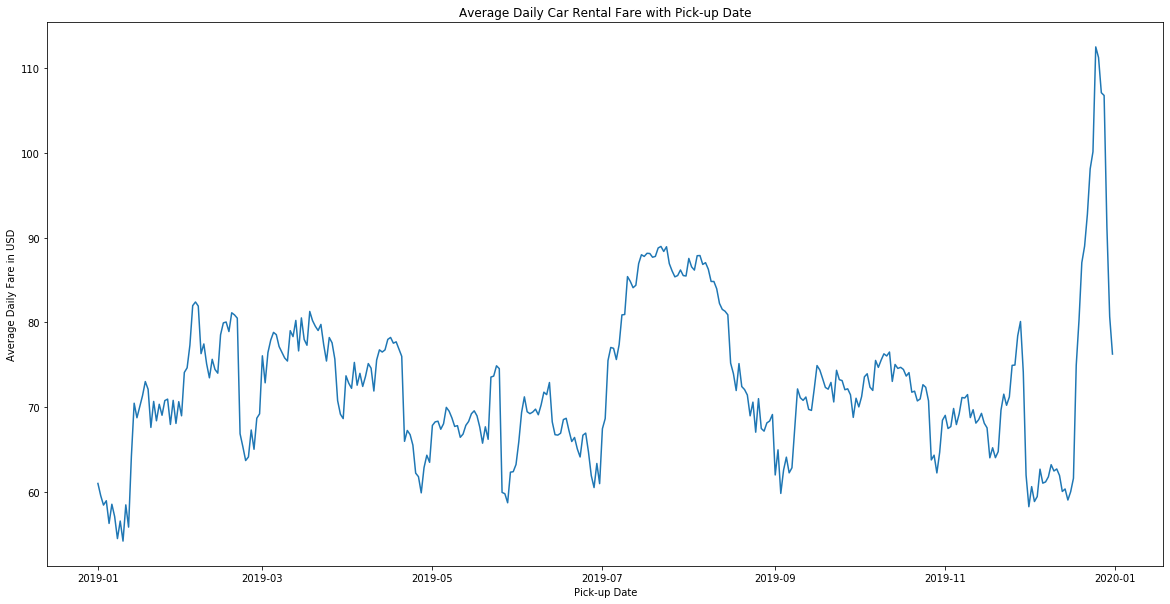

In [66]:
plt.figure(figsize=(20,10))
plt.plot(converted_dates, avg_agency['AVG_DAILY_FARE'])
plt.title("Average Daily Car Rental Fare with Pick-up Date")
plt.xlabel("Pick-up Date")
plt.ylabel("Average Daily Fare in USD")
plt.show()

Average daily fare for different agencies.

<b>Insight: Rental fare in ZL is higher than others but in general the difference among agencies is not very large.

In [78]:
per_agency = d.groupby(['AGENCY']).mean()

In [79]:
per_agency = per_agency.reset_index()

In [80]:
per_agency

,AGENCY,LOR,MIN_DAILY_FARE,AVG_DAILY_FARE
0,AL,6.880147,49.106741,72.168082
1,ET,6.880147,52.929516,75.282484
2,ZD,6.890960,49.065970,68.702522
3,ZE,6.872712,44.489189,74.361444
4,ZI,6.874366,55.171811,78.413043
5,ZL,6.876021,75.097967,87.745544
6,ZR,6.872712,38.355778,62.000557
7,ZT,6.872712,38.187669,61.808907


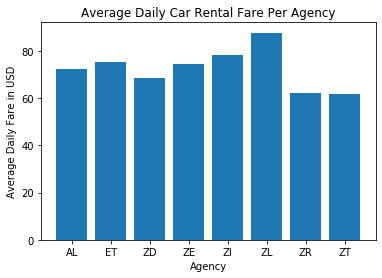

In [85]:
plt.bar(per_agency['AGENCY'], per_agency['AVG_DAILY_FARE'])
plt.title("Average Daily Car Rental Fare Per Agency")
plt.xlabel("Agency")
plt.ylabel("Average Daily Fare in USD")
plt.show()

Average daily fare for different length of rent.

<b>Insight: there is a trend that larger LOR gives lower daily fare, which is reasonable according to common sense. 

In [86]:
per_lor = d.groupby(['LOR']).mean()

In [87]:
per_lor = per_lor.reset_index()

In [88]:
per_lor

,LOR,MIN_DAILY_FARE,AVG_DAILY_FARE
0,1,59.459128,85.919331
1,2,57.869858,83.367049
2,3,57.354244,83.393761
3,4,57.741573,81.829674
4,5,56.767837,86.112701
5,6,48.544624,71.461452
6,7,42.383167,63.641292
7,8,42.803929,62.662736
8,9,42.016525,60.598683
9,30,33.587271,37.101699


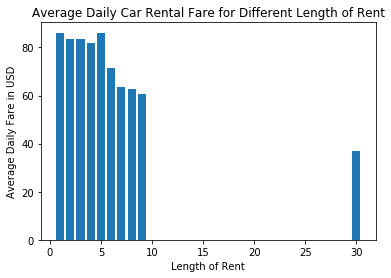

In [96]:
plt.bar(per_lor['LOR'], per_lor['AVG_DAILY_FARE'])
plt.title("Average Daily Car Rental Fare for Different Length of Rent")
plt.xlabel("Length of Rent")
plt.ylabel("Average Daily Fare in USD")
plt.show()

### Build the Model

How we interpret features?<br>
AGENCY: agency that provides car rental service. From EDA, we know the distribution for each agency is quite even.<br>
-> convert to numerical (1 hot encoding for now)<br>
<br>
PDATE: pick up date<br>
-> Possible conversion to datetime object (like in ARIMA), till then use numerical converted PDATE_month, day for now<br>
<br>
DDATE: drop/return date<br>
-> Drop because it can be calculated by PDATE and LOR<br>
<br>
LOR: length of rent (in days)<br>
-> already numerical data (int)<br>
<br>
MIN_DAILY_FARE: minimium daily rental fare<br>
-> currently not used this one<br>
<br>
AVG_DAILY_FARE: average daily rental fare<br>
-> numerical value to be predicted<br>
<br>
MONTH_PDATE, DAY_PDATE: newly generated values from PDATE<br>
-> to be used in model<br>

In [35]:
d["AVG_DAILY_FARE"].describe()

count    28384.000000
mean        72.560131
std         19.850851
min         22.275413
25%         59.356740
50%         72.540518
75%         86.832585
max        201.916235
Name: AVG_DAILY_FARE, dtype: float64

In [100]:
d_regression = d.copy()
drop_columns = ["PDATE", "DDATE", "MIN_DAILY_FARE","AVG_DAILY_FARE"]
d_regression.drop(columns = drop_columns , axis=1, inplace = True)
d_regression = pd.get_dummies(d_regression,columns=['AGENCY'], drop_first=True)
d_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28384 entries, 7380 to 20888
Data columns (total 10 columns):
LOR            28384 non-null int64
MONTH_PDATE    28384 non-null object
DAY_PDATE      28384 non-null object
AGENCY_ET      28384 non-null uint8
AGENCY_ZD      28384 non-null uint8
AGENCY_ZE      28384 non-null uint8
AGENCY_ZI      28384 non-null uint8
AGENCY_ZL      28384 non-null uint8
AGENCY_ZR      28384 non-null uint8
AGENCY_ZT      28384 non-null uint8
dtypes: int64(1), object(2), uint8(7)
memory usage: 1.1+ MB


In [101]:
d_regression.head()

,LOR,MONTH_PDATE,DAY_PDATE,AGENCY_ET,AGENCY_ZD,AGENCY_ZE,AGENCY_ZI,AGENCY_ZL,AGENCY_ZR,AGENCY_ZT
7380,5,01,01,0,0,1,0,0,0,0
8949,1,01,01,0,0,0,0,0,1,0
444,5,01,01,0,0,0,0,0,0,1
12372,9,01,01,1,0,0,0,0,0,0
12373,9,01,01,0,1,0,0,0,0,0


In [104]:
X = d_regression
y = d["AVG_DAILY_FARE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [107]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Train RMSE error", sqrt(mean_squared_error(y_train, reg.predict(X_train))))
print("Test RMSE error", sqrt(mean_squared_error(y_test, reg.predict(X_test))))
print("Coefficients")
for x, y in zip(X_train.columns.tolist(), reg.coef_):
    print(x,round(y,2))

Train RMSE error 12.959447124079894
Test RMSE error 12.615785065321706
Coefficients
LOR -1.83
MONTH_PDATE 0.73
DAY_PDATE 0.1
AGENCY_ET 2.89
AGENCY_ZD -3.69
AGENCY_ZE 2.06
AGENCY_ZI 6.14
AGENCY_ZL 15.57
AGENCY_ZR -10.25
AGENCY_ZT -10.59


In [108]:
clf = linear_model.Lasso()
clf.fit(X_train, y_train)
print("Train RMSE error", sqrt(mean_squared_error(y_train, clf.predict(X_train))))
print("Test RMSE error", sqrt(mean_squared_error(y_test, clf.predict(X_test))))
print("Coefficients")
for x, y in zip(X_train.columns.tolist(), clf.coef_):
    print(x,round(y,2))

Train RMSE error 14.154850876151322
Test RMSE error 13.804125614177934
Coefficients
LOR -1.8
MONTH_PDATE 0.62
DAY_PDATE 0.09
AGENCY_ET 0.0
AGENCY_ZD -0.0
AGENCY_ZE 0.0
AGENCY_ZI 0.0
AGENCY_ZL 7.72
AGENCY_ZR -2.16
AGENCY_ZT -2.35
